<a href="https://colab.research.google.com/github/itsabbhii/Training-AIML/blob/main/SelfMadeProjects/Amazon_user_segmentation/Amazon_user_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/itsabbhii/Training-AIML.git
%cd Training-AIML/SelfMadeProjects/Amazon_user_segmentation/

Cloning into 'Training-AIML'...
remote: Enumerating objects: 1305, done.
remote: Counting objects: 100% (479/479), done.
remote: Compressing objects: 100% (269/269), done.
remote: Total 1305 (delta 192), reused 456 (delta 181), pack-reused 826 (from 1)
Receiving objects: 100% (1305/1305), 58.99 MiB | 15.14 MiB/s, done.
Resolving deltas: 100% (197/197), done.
Updating files: 100% (976/976), done.
/content/Training-AIML/SelfMadeProjects/Amazon_user_segmentation


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset from the CSV file
df = pd.read_csv('amazon_clustering.csv')
df.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45


In [4]:
# Removing rows with missing values (NaN) from the dataset
df.dropna(inplace=True)

In [5]:
# Applying min max scaler to the features like Annual Income and Ratings
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Income', 'Rating']] = scaler.fit_transform(df[['Income', 'Rating']])

In [10]:
# Extracting the values from Annual Income and Ratings
X = df.iloc[:, 3:5].values

Text(0, 0.5, 'WCSS')

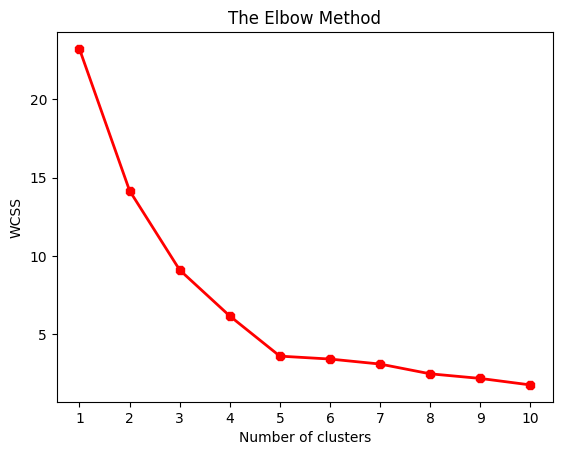

In [7]:
# Importing the KMeans clustering algorithm from scikit-learn
from sklearn.cluster import KMeans
wcss = []

# Applying WCSS(Within-Cluster Sum of Squares)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to visualize the Elbow Method
plt.plot(range(1, 11), wcss, linewidth=2, color='red', marker='8')
plt.xticks(np.arange(1, 11, 1))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [8]:
# Creating a KMeans model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fitting the KMeans model to the dataset 'X' and predicting the cluster assignments for each data point
y_kmeans = kmeans.fit_predict(X)

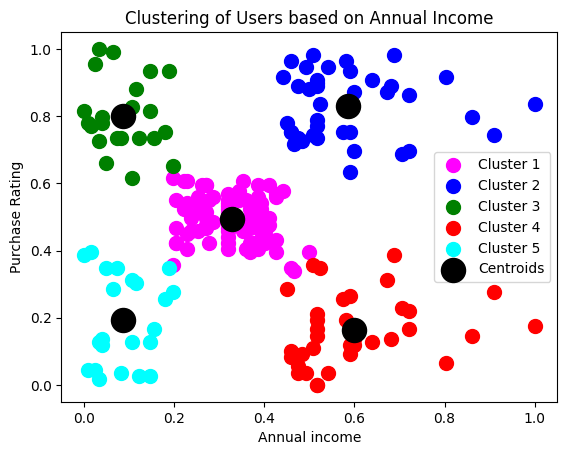

In [9]:
# Plot data points for each cluster with different colors and labels
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='magenta', label='Cluster 1') # Points in Cluster 1
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')    # Points in Cluster 2
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')   # Points in Cluster 3
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='red', label='Cluster 4')     # Points in Cluster 4
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='cyan', label='Cluster 5')    # Points in Cluster 5

# Plot the centroids of the clusters in black with larger marker size
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')

plt.title("Clustering of Users based on Annual Income")
plt.xlabel("Annual income")
plt.ylabel("Purchase Rating")
plt.legend()
plt.show()